In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
col_names = ['height', 'drop.angle', 'landing.angle']
# load dataset
data = pd.read_excel("data.xlsx")

In [4]:
data.head()

,height,drop.angle,landing.angle,rompe,pedazos,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,0.15,0,0.0,1,Two,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.15,0,28.3,1,Two,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.15,0,40.7,0,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.15,0,0.0,1,Two,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.15,0,0.0,1,Three,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.dropna(axis='columns')

,height,drop.angle,landing.angle,rompe,pedazos
0,0.15,0,0.0,1,Two
1,0.15,0,28.3,1,Two
2,0.15,0,40.7,0,NO
3,0.15,0,0.0,1,Two
4,0.15,0,0.0,1,Three
...,...,...,...,...,...
252,0.60,90,90.0,1,Two
253,0.60,90,86.9,1,Two
254,0.60,90,86.3,1,Two
255,0.60,90,78.9,0,NO


In [21]:
#split dataset in features and target variable
feature_cols = ['height', 'drop.angle', 'landing.angle']
X = data[feature_cols] # Features
y = data.rompe # Target variable

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% training and 30% test

In [23]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [24]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9487179487179487


In [25]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

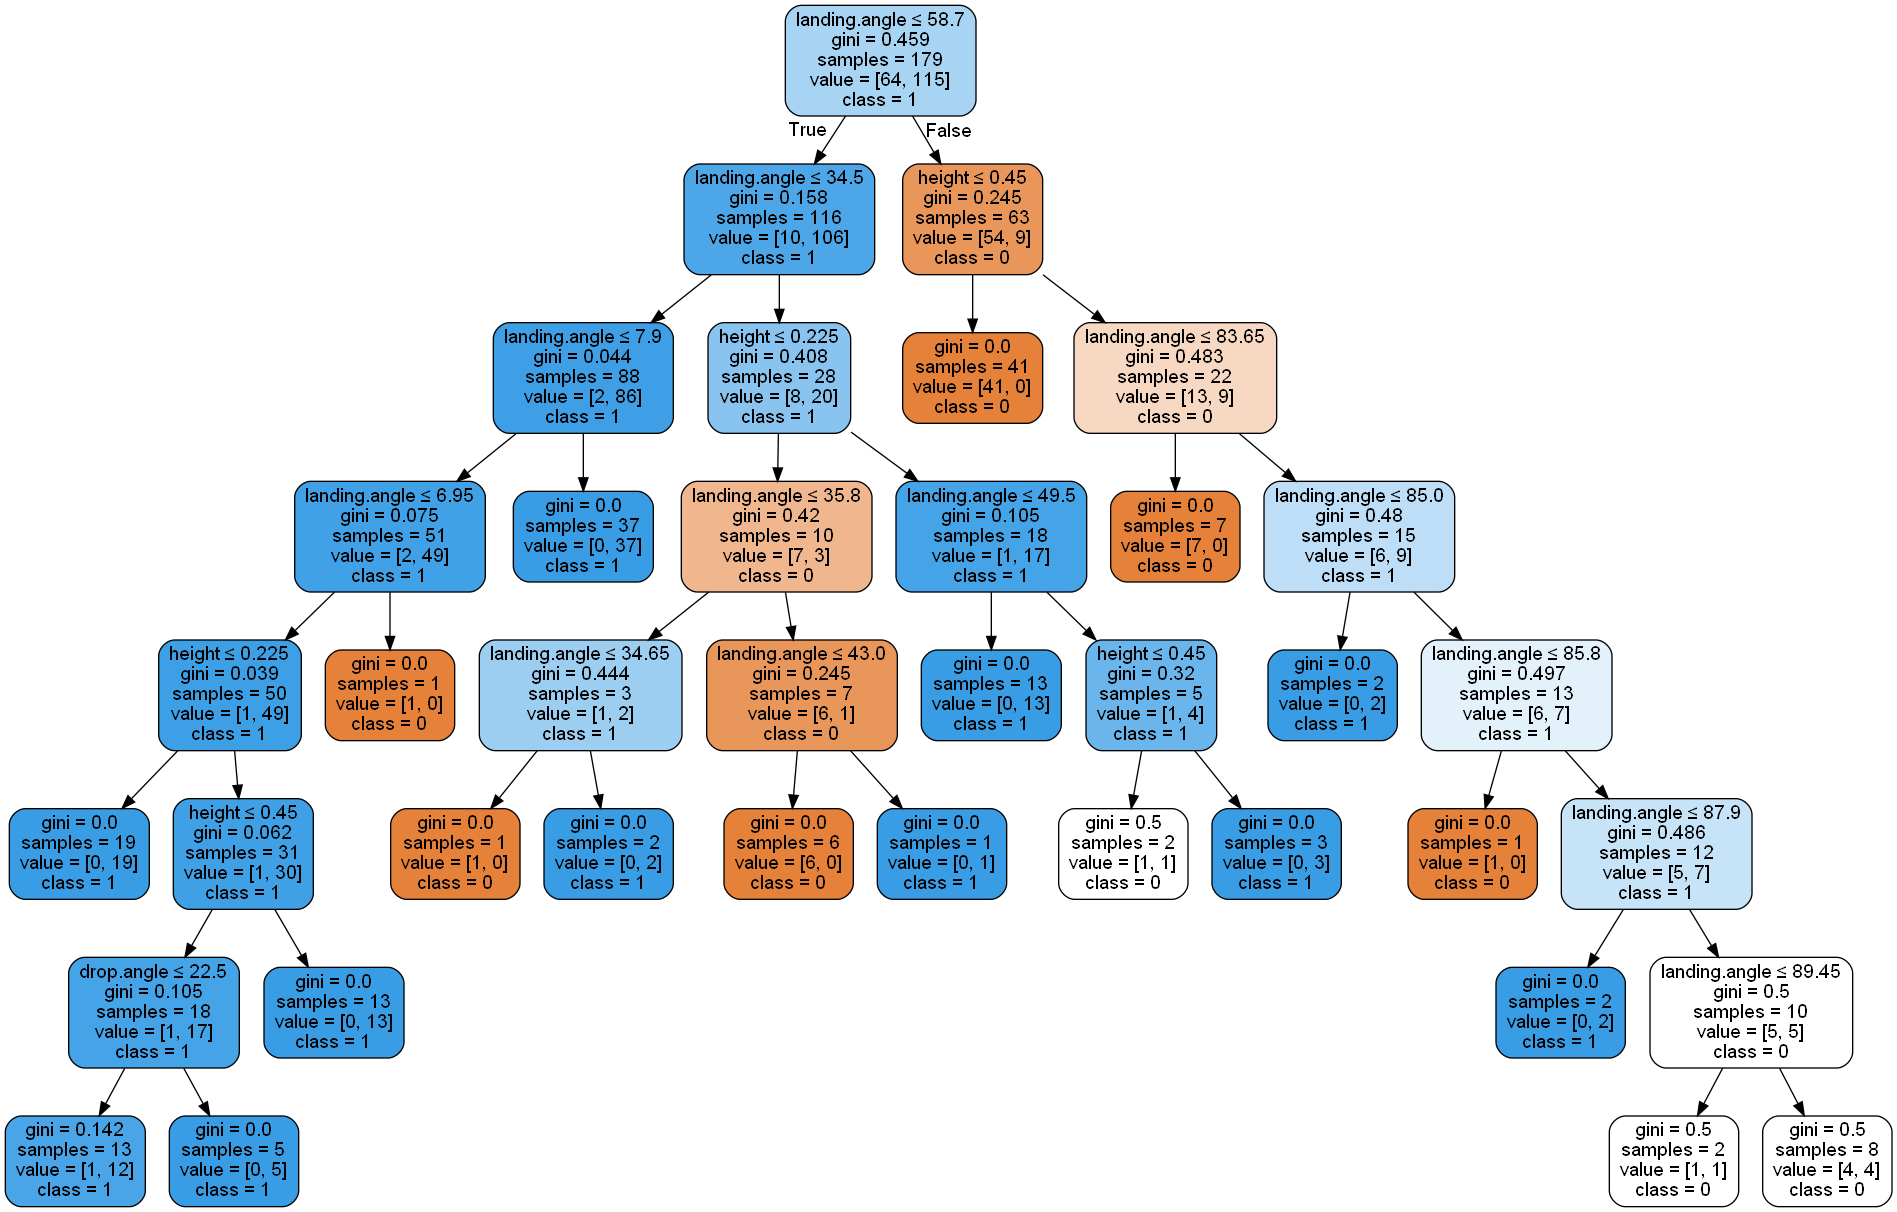

In [29]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

### Markdown

In [41]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9487179487179487


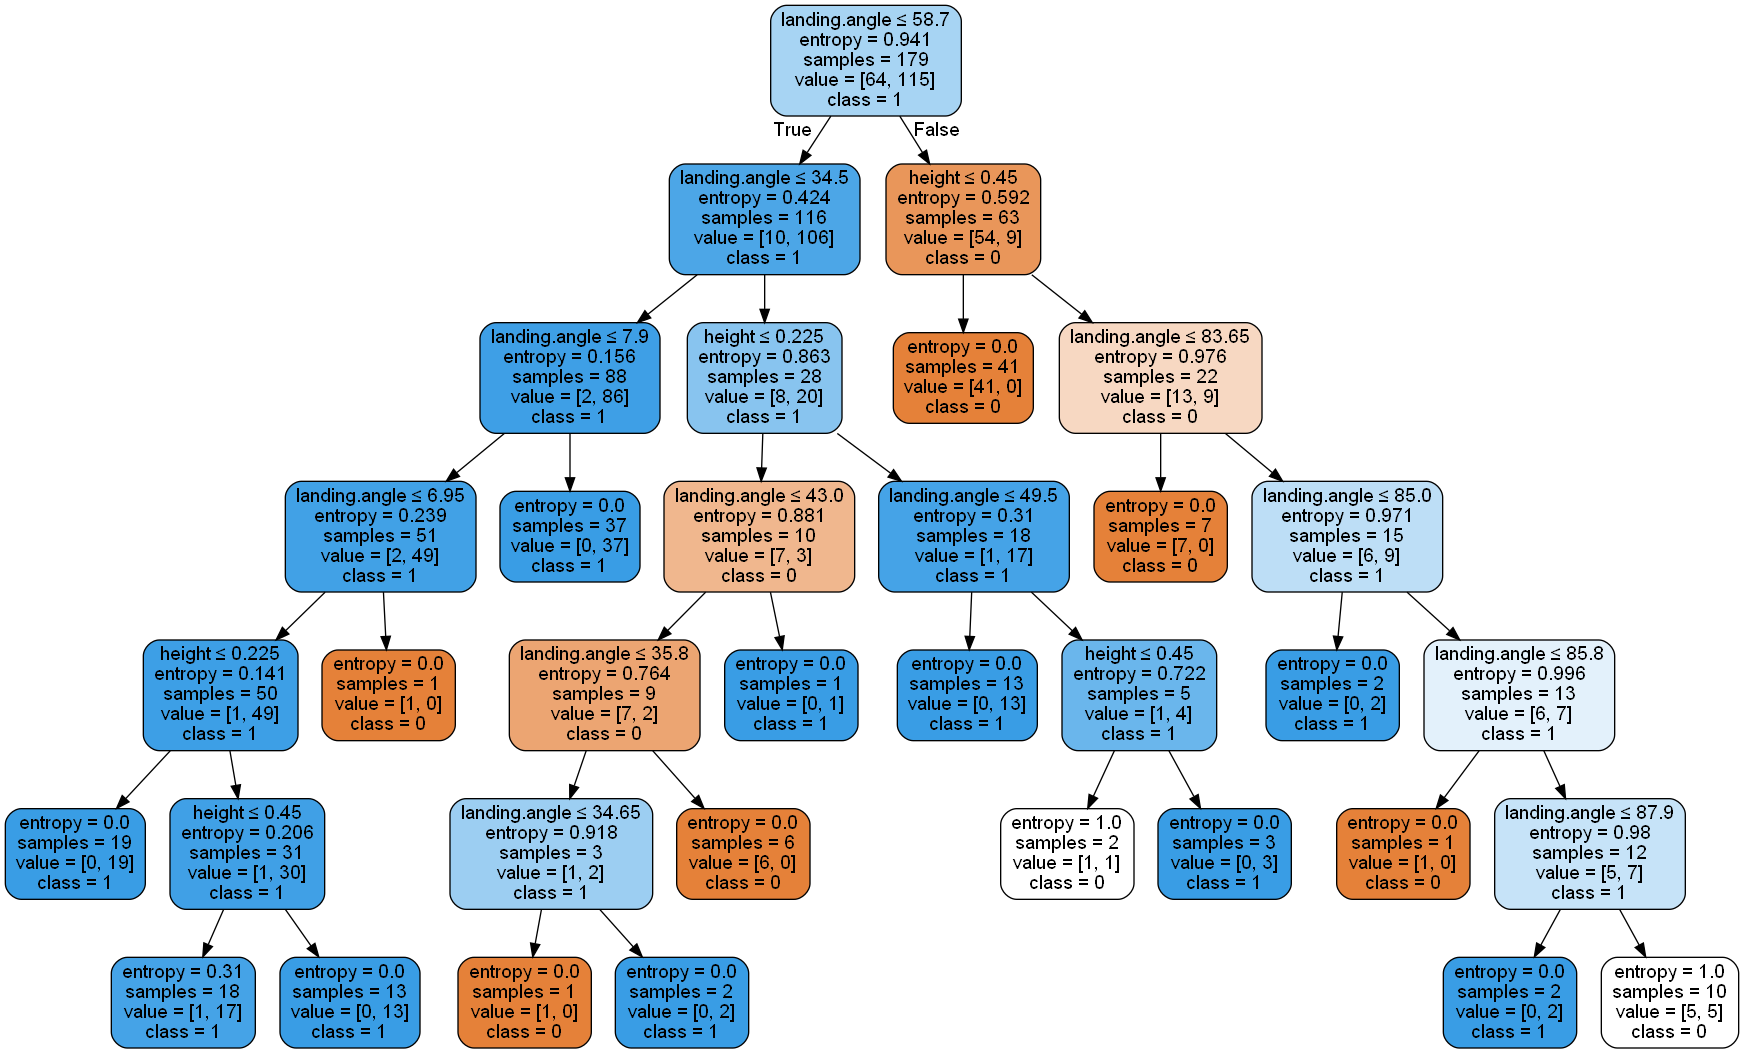

In [42]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())